**ANALISIS PERBANDINGAN KOMPLEKSITAS ALGORITMA ITERATIF DAN REKURSIF TERHADAP KALKULASI WAKTU JATUH BENDA HINGGA MENCAPAI TANAH PADA GERAK JATUH BEBAS DENGAN PENDEKATAN NUMERIK**
---

DS-47-01

Anggota Kelompok:

*   Julian Sudiyanto (103052300045)
*   Yohana Lydia (103052330068)



In [93]:
# Mengimport libraries yang dibutuhkan
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import gc

In [94]:
sys.setrecursionlimit(100000) # Menentukan limit rekursif

In [95]:
# Mendefinisikan fungsi 'waktu_iteratif' untuk mencari lama jatuhnya suatu objek dari ketinggian tertentu menggunakan metode Iteratif
def waktu_iteratif(y):
  waktu = 0
  v = 0

  while (y > 0):
    v = v + (-980 * 0.001) # -980 merupakan nilai gravitasi dengan satuan cm/s2
    y = y + (v * 0.001)
    waktu = waktu + 0.001
  return waktu

In [96]:
# Mendefinisikan fungsi 'waktu_rekursif' untuk mencari lama jatuhnya suatu objek dari ketinggian tertentu menggunakan metode Rekursif
def waktu_rekursif(y, v, waktu):
    if y <= 0:
        return waktu
    else:
      v2 = v + (-980 * 0.001) # -980 merupakan nilai gravitasi dengan satuan cm/s2
      y2 = y + (v2 * 0.001)
      waktu = waktu + 0.001
      return waktu_rekursif(y2, v2, waktu)

In [97]:
# Mendefinisikan fungsi 'kalkulasi' untuk menghitung lama jatuhnya suatu objek dari ketinggian tertentu dan running time algoritma Iteratif dan Rekursif
def kalkulasi(y):
    v = 0
    waktu = 0

    waktuIteratif = waktu_iteratif(y)
    runningIteratif = timeit.timeit(lambda: waktu_iteratif(y), number=1) # Menghitung running time dari fungsi waktu_iteratif

    waktuRekursif = waktu_rekursif(y, v, waktu)
    runningRekursif = timeit.timeit(lambda: waktu_rekursif(y, v, waktu), number=1) # Menghitung running time dari fungsi waktu_rekursif

    return waktuRekursif, waktuIteratif, runningRekursif, runningIteratif

In [98]:
np.random.seed(1)

# Membuat data dummy untuk mengaplikasikan fungsi waktu_iteratif dan waktu_rekursif
heights = np.random.uniform(100, 10000, 300)  # Menentukan ketinggian dari 100 cm hingga 10000 cm

# Mengubah bentuk list ke dataframe
data = {
    'Height (cm)': heights,
}

df = pd.DataFrame(data)

df.sort_values(by='Height (cm)', ascending=True) # Menampilkan isi dari dataframe secara terurut berdasarkan ketinggian

,Height (cm)
2,101.132311
250,103.980046
98,128.416238
149,224.304204
196,238.120572
...,...
251,9769.915575
298,9829.889426
171,9887.299929
40,9889.724780


In [99]:
gc.disable() # Mematikan garbage collector

# Mengaplikasikan fungsi 'kalkulasi' ke dataframe
df['Waktu Rekursif'], df['Waktu Iteratif'], df['Running Time Rekursif'], df['Running Time Iteratif'] = zip(*df['Height (cm)'].apply(kalkulasi))

gc.enable() # Menghidupkan kembali garbage collector

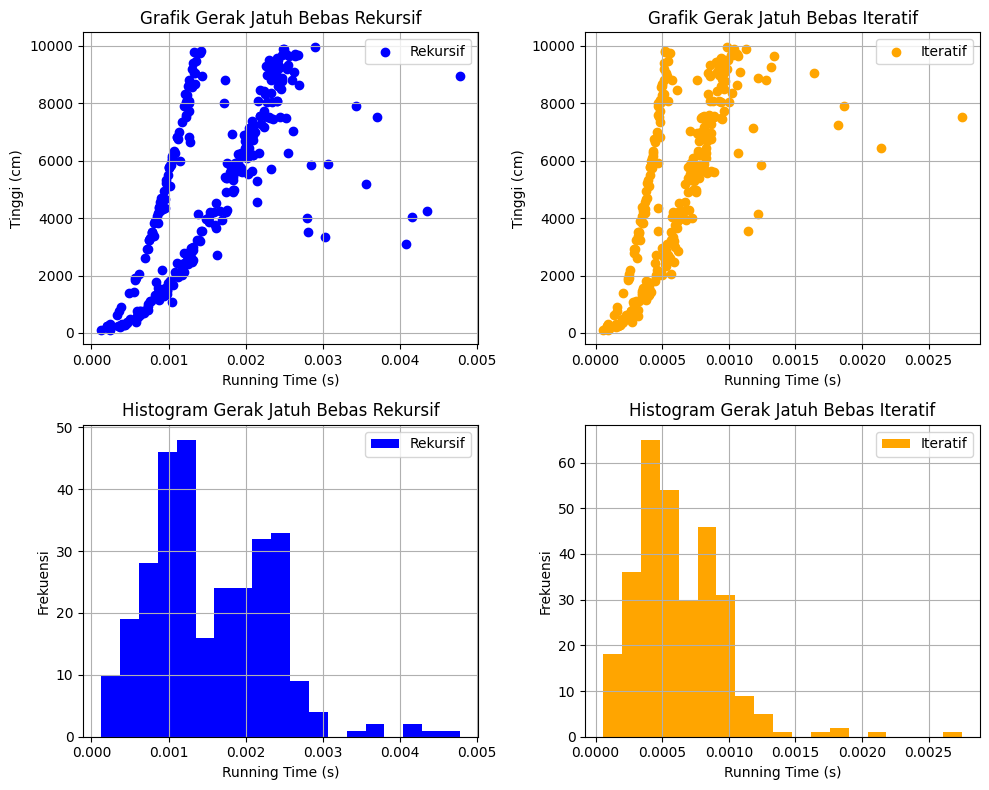

In [100]:
# Melakukan visualisasi kecepatan algoritma menggunakan Scatter Plot dan Histogram

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Scatter Plot perbandingan Tinggi dengan Running Time algoritma Rekursif
axs[0, 0].scatter(df['Running Time Rekursif'],df['Height (cm)'],  label='Rekursif', color='blue')
axs[0, 0].set_ylabel('Tinggi (cm)')
axs[0, 0].set_xlabel('Running Time (s)')
axs[0, 0].set_title('Grafik Gerak Jatuh Bebas Rekursif')
axs[0, 0].legend()
axs[0, 0].grid()

# Scatter Plot perbandingan Tinggi dengan Running Time algoritma Iteratif
axs[0, 1].scatter(df['Running Time Iteratif'],df['Height (cm)'],  label='Iteratif', color='orange')
axs[0, 1].set_ylabel('Tinggi (cm)')
axs[0, 1].set_xlabel('Running Time (s)')
axs[0, 1].set_title('Grafik Gerak Jatuh Bebas Iteratif')
axs[0, 1].legend()
axs[0, 1].grid()


bins_rekursif = np.linspace(df['Running Time Rekursif'].min(), df['Running Time Rekursif'].max(), 20)
bins_iteratif = np.linspace(df['Running Time Iteratif'].min(), df['Running Time Iteratif'].max(), 20)

# Histogram Plot frekuensi Running Time algoritma Rekursif
axs[1, 0].hist(df['Running Time Rekursif'], bins=bins_rekursif, label='Rekursif', color='blue') # Passing bins here
axs[1, 0].set_ylabel('Frekuensi') # Changed ylabel to frequency
axs[1, 0].set_xlabel('Running Time (s)')
axs[1, 0].set_title('Histogram Gerak Jatuh Bebas Rekursif') # Changed title
axs[1, 0].legend()
axs[1, 0].grid()

# Histogram Plot frekuensi Running Time algoritma Iteratif
axs[1, 1].hist(df['Running Time Iteratif'], bins=bins_iteratif, label='Iteratif', color='orange') # Passing bins here
axs[1, 1].set_ylabel('Frekuensi') # Changed ylabel to frequency
axs[1, 1].set_xlabel('Running Time (s)')
axs[1, 1].set_title('Histogram Gerak Jatuh Bebas Iteratif') # Changed title
axs[1, 1].legend()
axs[1, 1].grid()

# Adjust layout

plt.tight_layout()

# Show the plot
plt.show()

In [101]:
# Membuat kolom baru yang membandingkan Running Time algoritma Iteratif dengan Rekursif
df['Perbandingan Running Time (I:R)'] = df['Running Time Iteratif'] / df['Running Time Rekursif']
df

,Height (cm),Waktu Rekursif,Waktu Iteratif,Running Time Rekursif,Running Time Iteratif,Perbandingan Running Time (I:R)
0,4228.517847,2.938,2.938,0.001743,0.000578,0.331768
1,7231.212485,3.842,3.842,0.002105,0.001819,0.864327
2,101.132311,0.454,0.454,0.000234,0.000094,0.399457
3,3093.092469,2.512,2.512,0.004081,0.000534,0.130922
4,1552.883319,1.780,1.780,0.000865,0.000398,0.460011
...,...,...,...,...,...,...
295,775.272549,1.258,1.258,0.000356,0.000158,0.445078
296,3841.449375,2.800,2.800,0.000856,0.000355,0.415078
297,888.298169,1.346,1.346,0.000382,0.000158,0.414614
298,9829.889426,4.479,4.479,0.001418,0.000524,0.369269


In [102]:
# Mencari rata-rata perbandingan kedua Running Time dan mengkonversi ke dalam bentuk persentase untuk melihat efektifitas algoritma Iteratif dibandingkan Rekursif
efektivitas = df['Perbandingan Running Time (I:R)'].mean()
print(f"Efisiensi Algoritma Iteratif - Rekursif = {efektivitas * 100:.4f}%")

Efisiensi Algoritma Iteratif - Rekursif = 41.1333%


In [103]:
# Mencari jumlah anomali pada data
df['Rekursif < Iteratif'] = df['Running Time Rekursif'] < df['Running Time Iteratif']
df[df['Rekursif < Iteratif'] == True].shape[0]

2

In [104]:
# Melihat data anomali
df[df['Rekursif < Iteratif'] == True]

,Height (cm),Waktu Rekursif,Waktu Iteratif,Running Time Rekursif,Running Time Iteratif,Perbandingan Running Time (I:R),Rekursif < Iteratif
39,7526.428718,3.919,3.919,0.002281,0.00275,1.205836,True
187,6430.662721,3.623,3.623,0.002037,0.00214,1.050260,True


In [105]:
# Membuat data test yang memiliki nilai dari 0 meter - 100 meter

data_new = list(range(0, 10001, 1000))
test_data = pd.DataFrame(data_new, columns=['Height'])
test_data

,Height
0,0
1,1000
2,2000
3,3000
4,4000
5,5000
6,6000
7,7000
8,8000
9,9000


In [106]:
gc.disable() # Mematikan garbage collector

# Menerapkan fungsi 'kalkulasi' ke data test terbaru
test_data['Waktu Rekursif'], test_data['Waktu Iteratif'], test_data['Running Time Rekursif'], test_data['Running Time Iteratif'] = zip(*test_data['Height'].apply(kalkulasi))

gc.enable() # Menghidupkan kembali garbage collector

In [107]:
# Menampilkan test data
test_data

,Height,Waktu Rekursif,Waktu Iteratif,Running Time Rekursif,Running Time Iteratif
0,0,0.000,0.000,0.000001,0.000001
1,1000,1.429,1.429,0.000514,0.000172
2,2000,2.020,2.020,0.001125,0.000267
3,3000,2.474,2.474,0.000815,0.000491
4,4000,2.857,2.857,0.000923,0.000393
5,5000,3.194,3.194,0.001015,0.000385
6,6000,3.499,3.499,0.001075,0.000422
7,7000,3.780,3.780,0.001177,0.000456
8,8000,4.041,4.041,0.001355,0.000498
9,9000,4.286,4.286,0.001282,0.000548


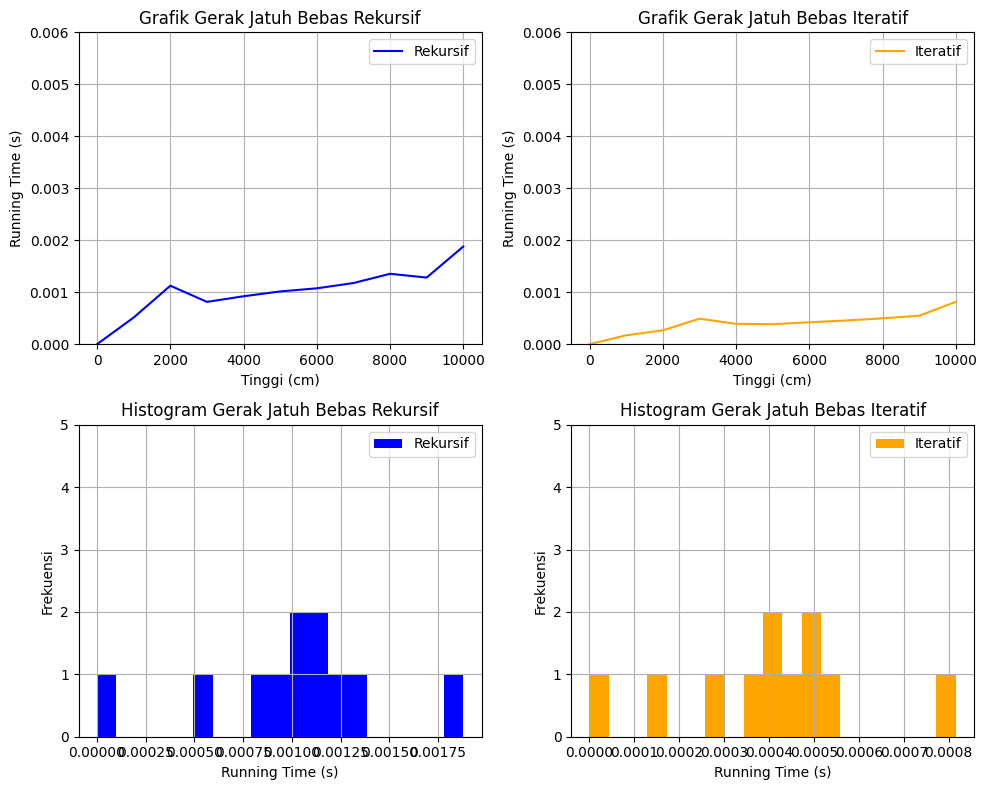

In [108]:
# Melakukan visualisasi kecepatan algoritma menggunakan Line Graph dan Histogram

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Line Graph perbandingan Tinggi dengan Running Time algoritma Rekursif
axs[0, 0].plot(test_data['Height'], test_data['Running Time Rekursif'],  label='Rekursif', color='blue')
axs[0, 0].set_xlabel('Tinggi (cm)')
axs[0, 0].set_ylabel('Running Time (s)')
axs[0, 0].set_title('Grafik Gerak Jatuh Bebas Rekursif')
axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 0].set_ylim(0,0.006)

# Line Grapg perbandingan Tinggi dengan Running Time algoritma Iteratif
axs[0, 1].plot(test_data['Height'], test_data['Running Time Iteratif'],  label='Iteratif', color='orange')
axs[0, 1].set_xlabel('Tinggi (cm)')
axs[0, 1].set_ylabel('Running Time (s)')
axs[0, 1].set_title('Grafik Gerak Jatuh Bebas Iteratif')
axs[0, 1].legend()
axs[0, 1].grid()
axs[0, 1].set_ylim(0,0.006)

bins_rekursif = np.linspace(test_data['Running Time Rekursif'].min(), test_data['Running Time Rekursif'].max(), 20)
bins_iteratif = np.linspace(test_data['Running Time Iteratif'].min(), test_data['Running Time Iteratif'].max(), 20)

# Histogram Plot frekuensi Running Time algoritma Rekursif
axs[1, 0].hist(test_data['Running Time Rekursif'], bins=bins_rekursif, label='Rekursif', color='blue')
axs[1, 0].set_ylabel('Frekuensi')
axs[1, 0].set_xlabel('Running Time (s)')
axs[1, 0].set_title('Histogram Gerak Jatuh Bebas Rekursif')
axs[1, 0].legend()
axs[1, 0].grid()
axs[1, 0].set_ylim(0,5)

# Histogram Plot frekuensi Running Time algoritma Iteratif
axs[1, 1].hist(test_data['Running Time Iteratif'], bins=bins_iteratif, label='Iteratif', color='orange')
axs[1, 1].set_ylabel('Frekuensi')
axs[1, 1].set_xlabel('Running Time (s)')
axs[1, 1].set_title('Histogram Gerak Jatuh Bebas Iteratif')
axs[1, 1].legend()
axs[1, 1].grid()
axs[1, 1].set_ylim(0,5)


plt.tight_layout()

plt.show()

In [109]:
# Membuat kolom baru yang membandingkan Running Time algoritma Iteratif dengan Rekursif
test_data['Perbandingan Running Time (I:R)'] = test_data['Running Time Iteratif'] / test_data['Running Time Rekursif']
test_data

,Height,Waktu Rekursif,Waktu Iteratif,Running Time Rekursif,Running Time Iteratif,Perbandingan Running Time (I:R)
0,0,0.000,0.000,0.000001,0.000001,1.040221
1,1000,1.429,1.429,0.000514,0.000172,0.335444
2,2000,2.020,2.020,0.001125,0.000267,0.237641
3,3000,2.474,2.474,0.000815,0.000491,0.602470
4,4000,2.857,2.857,0.000923,0.000393,0.425517
5,5000,3.194,3.194,0.001015,0.000385,0.379278
6,6000,3.499,3.499,0.001075,0.000422,0.392697
7,7000,3.780,3.780,0.001177,0.000456,0.387734
8,8000,4.041,4.041,0.001355,0.000498,0.367953
9,9000,4.286,4.286,0.001282,0.000548,0.427791


In [110]:
# Mencari rata-rata perbandingan kedua Running Time dan mengkonversi ke dalam bentuk persentase untuk melihat efektifitas algoritma Iteratif dibandingkan Rekursif
efektivitas = test_data['Perbandingan Running Time (I:R)'].mean()
print(f"Efisiensi Algoritma Iteratif - Rekursif = {efektivitas * 100:.4f}%")

Efisiensi Algoritma Iteratif - Rekursif = 45.7349%


In [111]:
# Mencari jumlah anomali pada data
test_data['Rekursif < Iteratif'] = test_data['Running Time Rekursif'] < test_data['Running Time Iteratif']
test_data[test_data['Rekursif < Iteratif'] == True].shape[0]

1

In [112]:
# Mendefinisikan fungsi 'kompleksitasWaktuRekursif' untuk menghitung kompleksitas waktu algoritma Rekursif
def kompleksitasWaktuRekursif(y, v):
    if y <= 0:
        return 0
    else:
      v2 = v + (-980 * 0.001) # -980 merupakan nilai gravitasi dengan satuan cm/s2
      y2 = y + (v2 * 0.001)
      return kompleksitasWaktuRekursif(y2, v2) + 2

# Mendefinisikan fungsi 'kompleksitasWaktuIteratif' untuk menghitung kompleksitas waktu algoritma Iteratif
def kompleksitasWaktuIteratif(y):
  v = 0
  total = 0
  while (y > 0):
    v = v + (-980 * 0.001) # -980 merupakan nilai gravitasi dengan satuan cm/s2
    y = y + (v * 0.001)
    total = total + 2
  return total

In [113]:
test_data

,Height,Waktu Rekursif,Waktu Iteratif,Running Time Rekursif,Running Time Iteratif,Perbandingan Running Time (I:R),Rekursif < Iteratif
0,0,0.000,0.000,0.000001,0.000001,1.040221,True
1,1000,1.429,1.429,0.000514,0.000172,0.335444,False
2,2000,2.020,2.020,0.001125,0.000267,0.237641,False
3,3000,2.474,2.474,0.000815,0.000491,0.602470,False
4,4000,2.857,2.857,0.000923,0.000393,0.425517,False
5,5000,3.194,3.194,0.001015,0.000385,0.379278,False
6,6000,3.499,3.499,0.001075,0.000422,0.392697,False
7,7000,3.780,3.780,0.001177,0.000456,0.387734,False
8,8000,4.041,4.041,0.001355,0.000498,0.367953,False
9,9000,4.286,4.286,0.001282,0.000548,0.427791,False


In [114]:
# Mengaplikasikan fungsi 'kompleksitasWaktuRekursif' dan 'kompleksitasWaktuIteratif' pada test_data
test_data['Kompleksitas Waktu Rekursif'] = test_data['Height'].apply(lambda y: kompleksitasWaktuRekursif(y, 0)) # Assuming initial velocity is 0
test_data['Kompleksitas Waktu Iteratif'] = test_data['Height'].apply(kompleksitasWaktuIteratif)

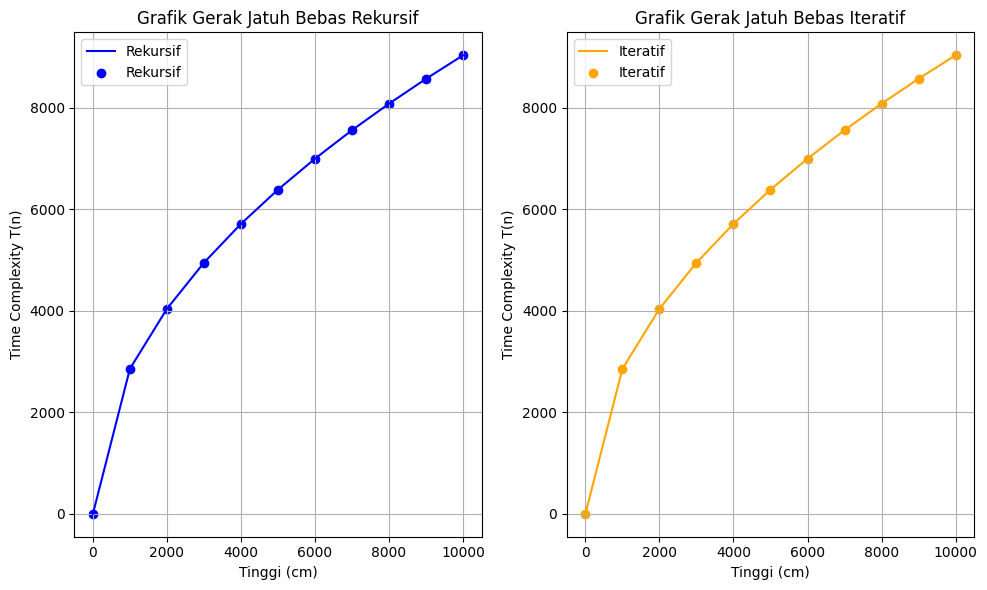

In [115]:
# Melakukan visualisasi kompleksitas waktu kedua algoritma menggunakan Line Graph dan Histogram

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Line Graph perbandingan Tinggi dengan kompleksitas waktu algoritma Rekursif
axs[0].plot(test_data['Height'], test_data['Kompleksitas Waktu Rekursif'],  label='Rekursif', color='blue')
axs[0].scatter(test_data['Height'], test_data['Kompleksitas Waktu Rekursif'],  label='Rekursif', color='blue')
axs[0].set_xlabel('Tinggi (cm)')
axs[0].set_ylabel('Time Complexity T(n)')
axs[0].set_title('Grafik Gerak Jatuh Bebas Rekursif')
axs[0].legend()
axs[0].grid()

# Line Grapg perbandingan Tinggi dengan kompleksitas waktu algoritma Iteratif
axs[1].plot(test_data['Height'], test_data['Kompleksitas Waktu Iteratif'],  label='Iteratif', color='orange')
axs[1].scatter(test_data['Height'], test_data['Kompleksitas Waktu Iteratif'],  label='Iteratif', color='orange')
axs[1].set_xlabel('Tinggi (cm)')
axs[1].set_ylabel('Time Complexity T(n)')
axs[1].set_title('Grafik Gerak Jatuh Bebas Iteratif')
axs[1].legend()
axs[1].grid()

plt.tight_layout()

plt.show()